# Laboratorio di Simulazione Numerica
## Esercitazione 2

### Esercizio 02.1
In questo esercizio vogliamo calcolare il seguente integrale mono-dimensionale: 
$$I = \int_0^1 \frac{\pi}{2}\cos\big(\pi \frac{x}{2}\big) dx = 1$$
usando metodi montecarlo.
In particolare si calcolano due stime dell'integrale, la prima campionando la variabile $x$ tra $0$ e $1$ tramite una distribuzione uniforme, la seconda utilizzando il metodo dell'Importance Sampling, campionando una distribuzione lineare con la seguente pdf:
$$ P(x) = 2(1-x) $$


<img src="Images/cos_lin.png" width="400">

Nell'immgine sopra sono mostrate le espressioni della funzione $f(x) = \frac{\pi}{2}\cos\big(\pi \frac{x}{2}\big)$ e la distribuzione non normalizzata $p(x) = \frac{\pi}{2} (1 -x)$. Vediamo che la distribuzione lineare è più simile all'integranda rispetto alla distribuzione uniforme, per cui con questo metodo dovremmo ottenere dei risultati più precisi.

Per la stima dell'integrale vengono eseguite $N=100$ misure. Una misura consiste di $10^4$ campioni della distribuzione scelta per poi esegure la media del valore della funzione su questi campioni. Si fa poi la media su più blocchi e si considera come errore la deviazione standard della media.

Per avere un codice che sia il più generale possibile e che quindi possa essere applicato anche in altri contesti, si sfrutta la programmazione a oggetti del *c++* e in particolare l'ereditarietà delle classi. La classe **Integral**, dichiarata in *integral.h*, è quella che svolge l'effettivo calcolo dell'integrale con il metodo Mnte Carlo, tramite i suoi metodi **uniformMC** (per il campionamento uniforme) e **importanceMC_01** (per il campionamento tramite distribuzione lineare. Per il campionamento della distribuzione lineare si usa il metodo della trasformata e per implementarlo viene aggiunto un'opportuno metodo alla classe **Random** in *random.h*.
Per poter scegliere diverse funzioni da integrare si usa la classe **BasicFunction** dichiarata in *basicFunction.h*, che contiene il metodo virtuale **Eval**. In *functions.h* cengono poi dichiarate le classi figlie che tramite ereditarietà specificano come debba operare il metodo **Eval**. L'ereditarietà quindi è stata sfruttata per avere la possibilità di specificare integrande differenti in contesti diversi. La classe **Integral** ha quindi come membro un puntatore a **BasicFunction** in modo che la funzione possa essere scelta durante l'esecuzione del codice principale.

I Grafici riportati sotto rappresentano l'adamento del valore stimato dell'integrale e la sua incertezza all'aumentare del numero di misure N.

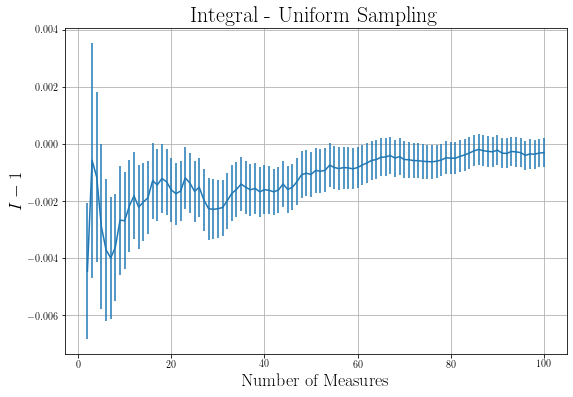

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

val, err = np.loadtxt("uniform_sampling.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(val)) + 2

plt.figure(figsize=(9,6))
plt.errorbar(x,val-1,yerr=err)
plt.xlabel(r'Number of Measures', fontsize=18)
plt.ylabel(r'$I-1$', fontsize=18)
plt.grid(True)
plt.title('Integral - Uniform Sampling', fontsize=22)

plt.show()

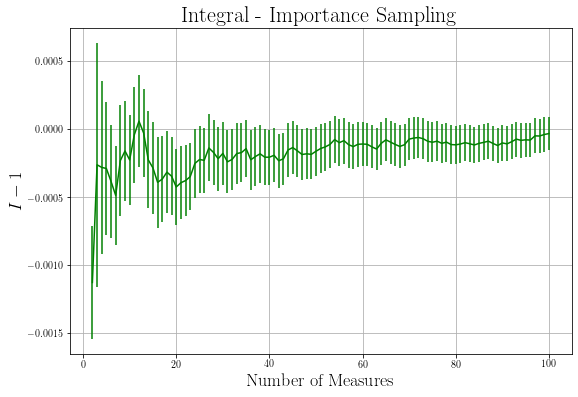

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

val, err = np.loadtxt("importance_sampling.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(val)) + 2

plt.figure(figsize=(9,6))
plt.errorbar(x,val-1,yerr=err, color='green')
plt.xlabel(r'Number of Measures', fontsize=18)
plt.ylabel(r'$I-1$', fontsize=18)
plt.grid(True)
plt.title('Integral - Importance Sampling', fontsize=22)

plt.show()

Notiamo che la scala degli errori nel secondo grafico è di circa un fattore $4$ minore di quella nel primo grafico. Si vede quindi l'efficacia dell'Importance Sampling con la distribuzione di probabilità scelta.

### Esercizio 02.2
In questo esercizio vogliamo simulare il Random Walk, prima in un reticolo tridimensionale con costante di reticolo $a=1$, poi nel caso contnuo, cioè facendo sempre passi di lunghezza $a$ però in una qualsiasi direzione campionata uniformemente su tutto l'angolo solido. Vogliamo verificare se, al varire del numero di passi compiuti $N$, la distanza media dall'origine $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ abbia un andamento del tipo $f(N) = k \sqrt{N}$.

L'elemento principale del codice che implementa il Random Walk è la classe **RandomWalk** dichiarata nel file *randomWalk.h*.
Come mebri possiede: un **vector** che rappresenta il vettore posizione nello spazio 3D e un numero **m_a** che rappresenta il passo del reticolo o la lunghezza dello step nel caso continuo.
I metodi principali della classe che effettivamente implementeano il Random Walk nei due casi sono **LatticeRW** e **ContinuumRW**.

Per ogni $N$ da $1$ a $100$ vengono eseguite $10^4$ simulazioni che poi vengono divise in $100$ blocchi per poter stimare l'errore con il *blocking method*. Nel grafici vengono mostrati gli andamenti di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ al variare di N in entrambi i casi e viene mostrato il fit con la funzione  $f(N) = k \sqrt{N}$.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


Optimized parameter k
[0.92328869]
Parameter uncertainty
[0.00048006]


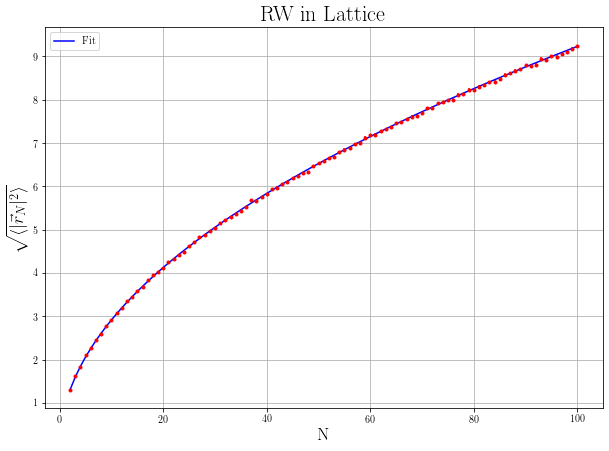

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

def f(x,k):  # defining the fitting function
    return k*np.sqrt(x)

val, err = np.loadtxt("lattice.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(val)) + 2

plt.figure(figsize=(10,7))
plt.errorbar(x,val,yerr=err, fmt='.', color='red')
plt.xlabel(r'N', fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=18)
plt.grid(True)
plt.title('RW in Lattice', fontsize=22)

p_opt, p_cov = curve_fit(f, x, val, sigma=err, bounds=([0],[3]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit, color='blue', label='Fit') # plotting fitted function
plt.legend()

print("Optimized parameter k")
print(p_opt)
print("Parameter uncertainty")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

Optimized parameter k
[0.92304333]
Parameter uncertainty
[0.00055237]


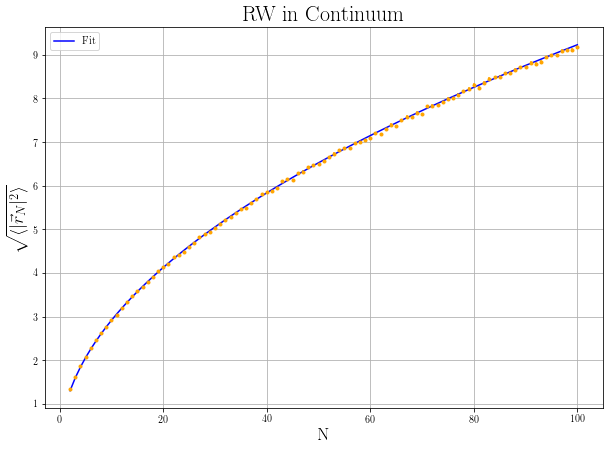

In [5]:
val, err = np.loadtxt("continuum.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(val)) + 2

plt.figure(figsize=(10,7))
plt.errorbar(x,val,yerr=err, fmt='.', color='orange')
plt.xlabel(r'N', fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=18)
plt.grid(True)
plt.title('RW in Continuum', fontsize=22)

p_opt, p_cov = curve_fit(f, x, val, sigma=err, bounds=([0],[3]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit, color='blue', label='Fit') # plotting fitted function
plt.legend()

print("Optimized parameter k")
print(p_opt)
print("Parameter uncertainty")
print(np.sqrt(np.diagonal(p_cov)))


plt.show()